# Auto Differentiation

## Autograd
[autograd](https://github.com/HIPS/autograd) <br>
[tutorial](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md) <br>


## Marcov Chain Monte Carlo using Autograd
[MCMC github sympyl](https://github.com/mcleonard/sampyl) <br>
[dock sampyl](http://matatat.org/sampyl/) <br>
[Github Dark Energy with MCMC -- notebooks](https://github.com/HIPS/DESI-MCMC) <br>

In [1]:
%matplotlib inline
import autograd.numpy as np
from autograd import grad
from autograd import elementwise_grad as egrad
import matplotlib.pyplot as plt

def tanh(x):
    y = np.exp(-2.0*x)
    return (1.0 - y) / (1.0 + y)

%matplotlib inline

In [2]:
grad_tanh = grad(tanh)
grad_tanh(1.0)

0.419974341614026

In [3]:
(tanh(1.0001) - tanh(0.9999)) / 0.0002

0.41997434264973155

<function matplotlib.pyplot.show(*args, **kw)>

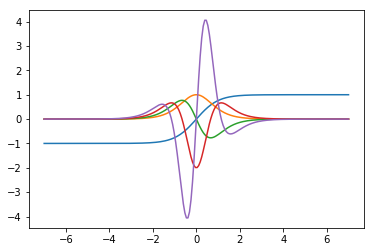

In [4]:
x = np.linspace(-7, 7, 200)

plt.plot(x,tanh(x), x,egrad(tanh)(x), x,egrad(egrad(tanh))(x), x,egrad(egrad(egrad(tanh)))(x),
        x,egrad(egrad(egrad(egrad(tanh))))(x) )


plt.show

## from tutorials page:

In [5]:

def taylor_sine(x):  # Taylor approximation to sine function
    ans = currterm = x
    i = 0
    while np.abs(currterm) > 0.001:
        currterm = -currterm * x**2 / ((2 * i + 3) * (2 * i + 2))
        ans = ans + currterm
        i += 1
    return ans

grad_sine = grad(taylor_sine)
print( "Gradient of sin(pi) is", grad_sine(np.pi))

Gradient of sin(pi) is -0.9998995297042174


In [6]:

def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:", training_loss(weights))

for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("epoc II loss:", training_loss(weights))

for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("epocIII loss:", training_loss(weights))

for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("epoc IV loss:", training_loss(weights))

for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("epoc  V loss:", training_loss(weights))

for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("epoc VI loss:", training_loss(weights))

for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("epocVII loss:", training_loss(weights))

Initial loss: 2.772588722239781
Trained loss: 1.067270675787016
epoc II loss: 0.6804509427909694
epocIII loss: 0.4975654640647788
epoc IV loss: 0.3912679829522958
epoc  V loss: 0.3219187554261316
epoc VI loss: 0.27316825443157516
epocVII loss: 0.23706059699268076
